In [126]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np


In [127]:
File1 = "../Clean Default.csv"
Default_info = pd.read_csv(File1)
Default_info.head()

,Unnamed: 0,BAD,Loan Total,Mortgage Due,Home Value,Reason of Default,Occupation,Years at Job,Major derogatory,Delinquent credit lines,Age Of Oldest Credit Line in Months,Number Of Recent Credit Inquiries,Number of Credit Lines,Debt-to-Income Ratio
0,3538,0,18600,57300.0,8000.0,DebtCon,Other,6.0,NaN,NaN,68.000000,1.0,17.0,NaN
1,40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
2,156,1,5000,NaN,9100.0,HomeImp,Other,1.0,0.0,0.0,54.733333,2.0,8.0,NaN
3,213,1,5200,NaN,9500.0,DebtCon,Other,1.0,0.0,1.0,81.100000,1.0,2.0,NaN
4,940,1,9100,NaN,11550.0,HomeImp,Other,NaN,0.0,0.0,51.933333,1.0,3.0,NaN


In [128]:
newDefault = Default_info.drop(Default_info.iloc[:, 5:],axis = 1)
newDefault.head()

,Unnamed: 0,BAD,Loan Total,Mortgage Due,Home Value
0,3538,0,18600,57300.0,8000.0
1,40,1,3000,NaN,8800.0
2,156,1,5000,NaN,9100.0
3,213,1,5200,NaN,9500.0
4,940,1,9100,NaN,11550.0


In [129]:
File2 = "../Clean Long Beach.csv"
LB_info = pd.read_csv(File2)
LB_info = LB_info.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Zipcode","Type"],axis = 1)
LB_info = LB_info.convert_objects(convert_numeric=True)
LB_info['Long Beach Zip Code'] = LB_info['Long Beach Zip Code'].astype(np.float64)
LB_info = LB_info.sort_values("Home Value",ascending = True)
LB_info.head(20)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,Long Beach Zip Code,Home Value
0,90802.0,378200.0
9,90813.0,396200.0
3,90805.0,466700.0
8,90810.0,477400.0
2,90804.0,491300.0
4,90806.0,535500.0
5,90807.0,639100.0
6,90808.0,685500.0
11,90815.0,697200.0
10,90814.0,750600.0


In [130]:
# newTable = pd.merge(newDefault, LB_info,on = "Home Value",how = "outer")
# newTable = newTable.sort_values("Home Value",ascending = True)
# newTable = newTable.dropna(subset=['Long Beach Zip Code'])
# newTable.head(2000)

In [131]:
Tabless = Default_info[Default_info["Home Value"] < 378200.0]
Tabless.head()

,Unnamed: 0,BAD,Loan Total,Mortgage Due,Home Value,Reason of Default,Occupation,Years at Job,Major derogatory,Delinquent credit lines,Age Of Oldest Credit Line in Months,Number Of Recent Credit Inquiries,Number of Credit Lines,Debt-to-Income Ratio
0,3538,0,18600,57300.0,8000.0,DebtCon,Other,6.0,NaN,NaN,68.000000,1.0,17.0,NaN
1,40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
2,156,1,5000,NaN,9100.0,HomeImp,Other,1.0,0.0,0.0,54.733333,2.0,8.0,NaN
3,213,1,5200,NaN,9500.0,DebtCon,Other,1.0,0.0,1.0,81.100000,1.0,2.0,NaN
4,940,1,9100,NaN,11550.0,HomeImp,Other,NaN,0.0,0.0,51.933333,1.0,3.0,NaN


In [132]:
#Convert the column Home Value from the LB Dataframe to list
list1 = LB_info['Home Value'].tolist()
list1.pop(11)

Total_list= [];
Default_list = [];
Not_Default_list = []
#Run a for loop to see all Default table that are less than the current House value i  
for i in list1:
    Tabless = Default_info[Default_info["Home Value"] < i]
    Total = Tabless['BAD'].count()
    Total_list.append(Total)
    Default = (Tabless['BAD'] == 1).sum()
    Default_list.append(Default)
    Not_Default = (Tabless['BAD'] == 0).sum()
    Not_Default_list.append(Not_Default)
    
# print(list1)
# print(Total_list) 
# print(Default_list) 
# print(Not_Default_list)  

#Making a DataFrame from the list we were able to obtain 
Numbers = pd.Series(list1)
df = pd.DataFrame({"Total Count of Default & Not Default": Total_list, "Sum of Default": Default_list,"Sum of Not Default":Not_Default_list})
df = df.set_index(Numbers)
df

,Total Count of Default & Not Default,Sum of Default,Sum of Not Default
378200.0,5831,1076,4755
396200.0,5831,1076,4755
466700.0,5833,1077,4756
477400.0,5841,1077,4764
491300.0,5841,1077,4764
535500.0,5844,1080,4764
639100.0,5844,1080,4764
685500.0,5844,1080,4764
697200.0,5844,1080,4764
750600.0,5844,1080,4764


378200.0    18.453096
396200.0    18.453096
466700.0    18.463912
477400.0    18.438624
491300.0    18.438624
535500.0    18.480493
639100.0    18.480493
685500.0    18.480493
697200.0    18.480493
750600.0    18.480493
985300.0    18.536252
dtype: float64
378200.0    81.546904
396200.0    81.546904
466700.0    81.536088
477400.0    81.561376
491300.0    81.561376
535500.0    81.519507
639100.0    81.519507
685500.0    81.519507
697200.0    81.519507
750600.0    81.519507
985300.0    81.463748
dtype: float64


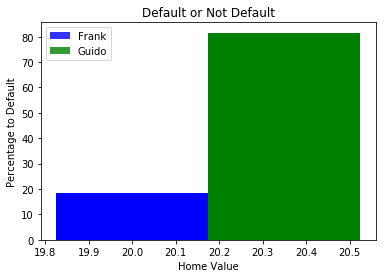

In [165]:
percent_default =(df["Sum of Default"]/df["Total Count of Default & Not Default"]*100)
#percent_default = tuple(percent_default)
print(percent_default)
percent_not_default = (df["Sum of Not Default"]/df["Total Count of Default & Not Default"]*100)
#percent_not_default = tuple(percent_not_default)
print(percent_not_default)


fig, ax = plt.subplots()
index = 20
bar_width = 0.35
opacity = 0.8

plt.bar(index, percent_default, bar_width, alpha=opacity, color='b', label='Frank')
plt.bar(index + bar_width, percent_not_default, bar_width, alpha=opacity, color='g', label='Guido')

plt.xlabel('Home Value')
plt.ylabel('Percentage to Default')
plt.title('Default or Not Default')
#plt.xticks((index + bar_width)/2, ('G1', 'G2', 'G3', 'G4','G5','G6','G7','G8','G9','G10','G11'))
plt.legend()

plt.show()
